In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [54]:
%matplotlib widget

# Vote migration

In [2]:
v23=pd.read_csv('./vote25.csv')


In [3]:
v22=pd.read_csv('./vote24.csv',encoding='cp1255')

In [4]:
v22.columns

Index(['סמל ועדה', 'ברזל', 'שם ישוב', 'סמל ישוב', 'קלפי', 'ריכוז', 'שופט',
       'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב', 'ג', 'ודעם', 'ז', 'זץ',
       'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ', 'כך', 'כן', 'ל', 'מחל',
       'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי', 'צכ', 'צף', 'ץ', 'ק',
       'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס', 'ת', 'Unnamed: 50'],
      dtype='object')

In [5]:
#v23=pd.read_csv('./vote24.csv',encoding='cp1255')
#v22=pd.read_csv('./vote23.csv',encoding='cp1255')

In [6]:
v22['kalfi']=v22['קלפי'].astype(str)
v23['kalfi']=v23['קלפי'].astype(str)
v22['city']=v22['שם ישוב'].astype(str)
v23['city']=v23['שם ישוב'].astype(str)
cols = v23.columns.copy()
for cid in cols:
    v23 = v23.rename(columns={cid:cid+'_23'})
cols = v22.columns
for cid in cols:
    v22 = v22.rename(columns={cid:cid+'_22'})

In [7]:
xx=v23.merge(v22,how='inner',left_on=['city_23','kalfi_23'], right_on=['city_22', 'kalfi_22'])

In [8]:
xx

,סמל ועדה_23,ברזל_23,שם ישוב_23,סמל ישוב_23,קלפי_23,ריכוז_23,שופט_23,בזב_23,מצביעים_23,פסולים_23,...,קץ_22,ר_22,רנ_22,רף_22,רק_22,שס_22,ת_22,Unnamed: 50_22,kalfi_22,city_22
0,18,10619,אבו גווייעד שבט,967,3.1,1,0,570,173,4,...,0,0,0,0,0,0,0,NaN,3.1,אבו גווייעד שבט
1,18,10620,אבו גווייעד שבט,967,3.2,1,0,570,96,1,...,0,0,0,0,0,0,0,NaN,3.2,אבו גווייעד שבט
2,18,10621,אבו גווייעד שבט,967,3.3,1,0,570,169,1,...,0,0,0,0,0,0,0,NaN,3.3,אבו גווייעד שבט
3,18,10622,אבו גווייעד שבט,967,3.4,1,0,569,111,3,...,0,0,0,1,0,0,4,NaN,3.4,אבו גווייעד שבט
4,2,806,אבו גוש,472,1.1,5,0,598,360,7,...,0,0,0,0,0,1,0,NaN,1.1,אבו גוש
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534,18,9948,תפרח,709,2.0,1,0,533,473,6,...,0,0,0,0,0,72,0,NaN,2.0,תפרח
7535,18,9884,תקומה,665,1.0,1,0,514,415,1,...,0,9,1,0,0,7,22,NaN,1.0,תקומה
7536,18,10541,תראבין אצאנע שבט,970,1.0,1,0,582,74,2,...,0,0,0,0,0,0,0,NaN,1.0,תראבין אצאנע שבט
7537,18,10495,תראבין אצאנעישוב,1346,1.0,1,0,650,248,5,...,0,0,0,0,0,2,0,NaN,1.0,תראבין אצאנעישוב


In [9]:
p22 = []
p22.append('מחל')
p22.append('פה')
p22.append('שס')
p22.append('כן')
p22.append('אמת')
p22.append('ג')
p22.append('ל')
p22.append('ט')
p22.append('מרצ')
p22.append('ודעם')
p22.append('ב')
p22.append('ת')
p22.append('עם')
p22.append('יז')
p22.append('ר')


In [10]:
p23 = []
p23.append('מחל')
p23.append('פה')
p23.append('שס')
p23.append('כן')
p23.append('אמת')
p23.append('ט')
p23.append('ג')
p23.append('ל')
p23.append('עם')
p23.append('ום')
p23.append('מרצ')
p23.append('ד')
p23.append('ב')
p23.append('אצ')
p23.append('קץ')
p23.append('יז')
p23.append('צ')
p23.append('ף')
p23.append('ק')


## layout of variables:
22(0)->23(0)
22(1)->23(0)
...
22(end)->23(0)
22(abstained)->23(0)

So we have p22+1 source blocks each of p23+1 sinks

# Choose the region to focus on (xxx)

In [11]:
telaviv = v22['city_22'].value_counts().index[1]
xxx = xx[xx['city_22'] == 'בני ברק']
xxx = xx.copy()

### Remove kalfis with no vote holders (remote votes?)

In [12]:
xxx=xxx[xxx['בזב_22']!=0]
xxx=xxx[xxx['בזב_23']!=0]

### Number of kalfis

In [13]:
len(xxx)

6867

# Build the equations

In [14]:
# last party is the sink
p22a = p22.copy()
p22a.append('abstained')
p23a = p23.copy()
p23a.append('abstained')

num_22 = len(p22a)
num_23 = len(p23a)

a=np.zeros([200000, num_22 * num_23])
b=np.zeros([200000])

crowidx = 0
for _,crow in xxx.iterrows():
    # registered voters for each year
    bzb22 = crow['בזב_22']
    bzb23 = crow['בזב_23']
    
    # get the total votes for each year
    tot_votes_23 = 0
    for c23 in p23:
        tot_votes_23 += crow[c23+'_23']
    tot_votes_22 = 0
    for c22 in p22:
        tot_votes_22 += crow[c22+'_22']
    crow['abstained_22'] = bzb22-tot_votes_22
    crow['abstained_23'] = bzb23-tot_votes_23

    # create the equations
    # for each kalfi, for each 23 party, we get one equation
    for idx_23,c23 in enumerate(p23a):
        b[crowidx] = crow[c23+'_23']
        for idx_22, c22 in enumerate(p22a):
            a[crowidx, idx_22+idx_23*num_22] = crow[c22+'_22'] * bzb23/bzb22
        crowidx += 1

# add the sum1 for all variables from a given source
for source_idx in range(num_22):
    for sink_idx in range(num_23):
        a[crowidx, source_idx + sink_idx*(num_22)] = 1000000
    b[crowidx] = 1000000
    crowidx += 1

a = a[:crowidx,:]
b = b[:crowidx]

In [15]:
ff=np.linalg.lstsq(a,b,rcond=None)

In [16]:
import scipy.optimize
fff=scipy.optimize.nnls(a,b,maxiter=10000)

In [17]:
for idx_source, csource in enumerate(p22a):
    print('------------')
    print(csource)
    for idx_sink, csink in enumerate(p23a):
        tt = fff[0][idx_source+idx_sink*(len(p22a))] * 100
        print(csource+'-->'+csink+' : %f' % tt)
    print()

# calculate the total votes 22
tot22=[]
allsum=0
for cidx, c22 in enumerate(p22a[:-1]):
    csum=xxx[c22+'_22'].sum()
    tot22.append(csum)
    allsum += csum
tot22.append(xxx['בזב_22'].sum() - allsum)


# calculate the total votes 23
tot23=[]
allsum=0
for cidx, c23 in enumerate(p23a[:-1]):
    csum=xxx[c23+'_23'].sum()
    tot23.append(csum)
    allsum += csum
tot23.append(xxx['בזב_23'].sum() - allsum)


print('***********')
for idx_sink,csink in enumerate(p23a):
    print('------------')
    print(csink)
    for idx_source, csource in enumerate(p22a):
        tt=fff[0][idx_source+idx_sink*(len(p22a))]
        tt = 100 * tt * tot22[idx_source] / tot23[idx_sink]
        print(csource+'-->'+csink+' : %f' % tt)
    print()
    
# for idx_sink, csink in enumerate(p23a):
#     print('None -->'+csink+' : %f' % fff[0][len(p23a)-1+idx_sink*(len(p22a))])


------------
מחל
מחל-->מחל : 87.931464
מחל-->פה : 0.000000
מחל-->שס : 0.000000
מחל-->כן : 0.000000
מחל-->אמת : 0.000000
מחל-->ט : 12.068706
מחל-->ג : 0.000000
מחל-->ל : 0.000000
מחל-->עם : 0.000000
מחל-->ום : 0.000000
מחל-->מרצ : 0.000000
מחל-->ד : 0.000000
מחל-->ב : 0.000000
מחל-->אצ : 0.000000
מחל-->קץ : 0.000000
מחל-->יז : 0.000000
מחל-->צ : 0.000000
מחל-->ף : 0.000000
מחל-->ק : 0.000000
מחל-->abstained : 0.000000

------------
פה
פה-->מחל : 0.000000
פה-->פה : 96.170175
פה-->שס : 0.000000
פה-->כן : 2.535988
פה-->אמת : 0.000000
פה-->ט : 0.000000
פה-->ג : 0.000000
פה-->ל : 0.000000
פה-->עם : 0.000000
פה-->ום : 0.000000
פה-->מרצ : 0.000000
פה-->ד : 0.000000
פה-->ב : 0.000000
פה-->אצ : 0.000000
פה-->קץ : 0.000000
פה-->יז : 0.000000
פה-->צ : 0.000000
פה-->ף : 0.000000
פה-->ק : 0.000000
פה-->abstained : 1.293908

------------
שס
שס-->מחל : 0.000000
שס-->פה : 0.000000
שס-->שס : 100.000082
שס-->כן : 0.000000
שס-->אמת : 0.000000
שס-->ט : 0.000000
שס-->ג : 0.000000
שס-->ל : 0.000000
שס-->עם :

# Do a sankey plot

In [18]:
from pysankey import sankey

## create x->y table

In [137]:
src=[]
sink=[]
src_weight=[]
sink_weight=[]
for idx_source,csrc in enumerate(p22a):
    for idx_sink,csink in enumerate(p23a):
        tt=fff[0][idx_source+idx_sink*(len(p22a))]
        tt =  tt * tot22[idx_source]
        if tt > 0.000001:
            if csrc == 'abstained':
                csrc = 'לא-הצביע'
            if csink == 'abstained':
                csink = 'לא-הצביע'
            src.append(csrc[::-1])
            sink.append(csink[::-1])
            src_weight.append(tt)

In [138]:
scolors={}
scolors['מרצ']='#ff0000'
scolors['אמת']='#a05050'
scolors['מחל']='#0000ff'
scolors['פה']='#00ff00'
scolors['כן']='#00a050'
scolors['ר']='#000000'
scolors['יז']='#000000'
scolors['עם']='pink'
scolors['ת']='#00ffff'
scolors['ב']='deepskyblue'
scolors['ודעם']='deeppink'
scolors['ט']='#0050a0'
scolors['ל']='linen'
scolors['ג']='#000000'
scolors['שס']='#000000'
scolors['ק']='#000000'
scolors['ף']='#000000'
scolors['צ']='#000000'
scolors['קץ']='#000000'
scolors['אצ']='#000000'
scolors['ד']='pink'
scolors['ום']='pink'
scolors['לא-הצביע']='yellow'
scolors['עיבצה-אל']='yellow'

In [139]:
sscolors={}
for ck,cv in scolors.items():
    sscolors[ck[::-1]]=cv

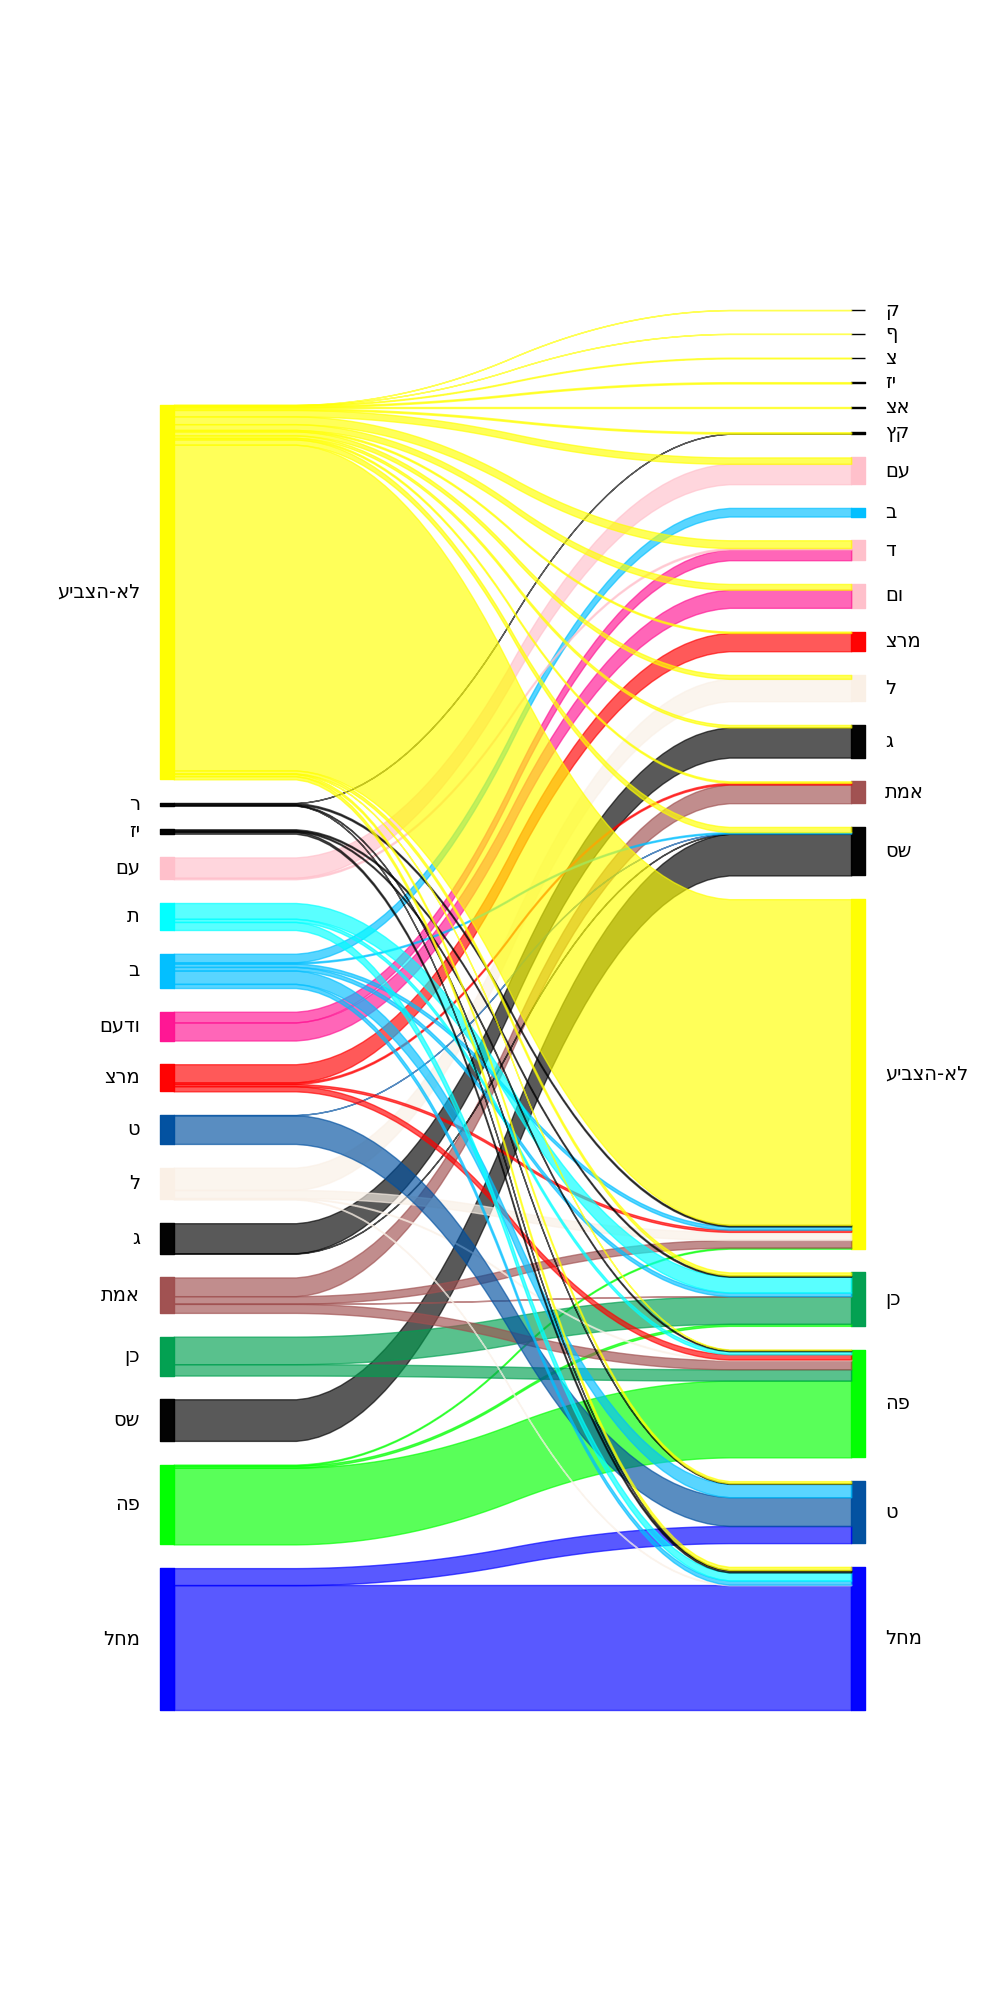

In [140]:
f=plt.figure(figsize=[10,20])
ax=sankey(src,sink,src_weight,aspect=5,rightColor=False,colorDict=sscolors)

In [141]:
f.savefig('./elections-2022-source-sink.pdf')

In [256]:
a=np.zeros([200000, (len(p22)+1) * (len(p23)+1) ])
b=np.zeros([200000])
crowidx = 0
for _,crow in xxx.iterrows():
#     if crow['בזב_22'] < 100:
#         continue
    tot_sink_voted = 0
    for idx_sink,csink in enumerate(p23):
        tot_voted=0
        for idx_source,csource in enumerate(p22):
            voted_source=crow[csource+'_22'] / crow['בזב_22']
            a[crowidx,idx_source+idx_sink*(len(p22)+1)] = voted_source
            tot_voted += voted_source
        # add the non-voters -> sink column
        if tot_voted>1:
            tot_voted = 1
        a[crowidx, len(p22)+idx_sink*(len(p22)+1)] = 1-tot_voted
        sink_voted = crow[csink+'_23'] / crow['בזב_23']
        b[crowidx] = sink_voted
        tot_sink_voted += sink_voted
        crowidx += 1
    # add the sources->non-voters eq
    tot_voted = 0
    for idx_source,csource in enumerate(p22):
        voted_source=crow[csource+'_22'] / crow['בזב_22']
        a[crowidx,idx_source+len(p23)*(len(p22)+1)] = voted_source
        tot_voted += voted_source
    # add the non-voters -> sink column
    if tot_voted>1:
        tot_voted = 1
    a[crowidx, len(p22)+len(p23)*(len(p22)+1)] = 1-tot_voted
    if tot_sink_voted > 1:
        tot_sink_voted = 1
    b[crowidx] = 1-tot_sink_voted
    crowidx += 1

In [100]:
# add the sum1 for all variables from a given source
for source_idx in range(len(p22)+1):
    for sink_idx in range(len(p23)+1):
        a[crowidx, source_idx + sink_idx*(len(p22)+1)] = 1000000
    b[crowidx] = 1000000
    crowidx += 1

In [101]:
a = a[:crowidx,:]
b = b[:crowidx]

In [102]:
a.shape

(137356, 320)

In [142]:
ff=np.linalg.lstsq(a,b,rcond=None)

In [143]:
import scipy.optimize
fff=scipy.optimize.nnls(a,b,maxiter=10000)

In [105]:
for idx_source, csource in enumerate(p22):
    for idx_sink, csink in enumerate(p23):
        print(csource+'-->'+csink+' : %f' % fff[0][idx_source+idx_sink*(len(p22)+1)])
    print(csource+'-->None : %f' % fff[0][idx_source+len(p23)*(len(p22)+1)])
    print()
for idx_sink, csink in enumerate(p23):
    print('None -->'+csink+' : %f' % fff[0][len(p23)+1+idx_sink*(len(p22)+1)])
print('None -->None : %f' % fff[0][len(p22)+(len(p23))*(len(p22)+1)])


מחל-->מחל : 0.881075
מחל-->פה : 0.000000
מחל-->שס : 0.000000
מחל-->כן : 0.000000
מחל-->אמת : 0.000000
מחל-->ט : 0.118925
מחל-->ג : 0.000000
מחל-->ל : 0.000000
מחל-->עם : 0.000000
מחל-->ום : 0.000000
מחל-->מרצ : 0.000000
מחל-->ד : 0.000000
מחל-->ב : 0.000000
מחל-->אצ : 0.000000
מחל-->קץ : 0.000000
מחל-->יז : 0.000000
מחל-->צ : 0.000000
מחל-->ף : 0.000000
מחל-->ק : 0.000000
מחל-->None : 0.000000

פה-->מחל : 0.000000
פה-->פה : 0.980340
פה-->שס : 0.000000
פה-->כן : 0.005007
פה-->אמת : 0.000000
פה-->ט : 0.000000
פה-->ג : 0.000000
פה-->ל : 0.000000
פה-->עם : 0.000000
פה-->ום : 0.000000
פה-->מרצ : 0.000000
פה-->ד : 0.000000
פה-->ב : 0.000000
פה-->אצ : 0.000000
פה-->קץ : 0.000000
פה-->יז : 0.000000
פה-->צ : 0.000000
פה-->ף : 0.000000
פה-->ק : 0.000000
פה-->None : 0.014654

שס-->מחל : 0.000000
שס-->פה : 0.000000
שס-->שס : 1.000000
שס-->כן : 0.000000
שס-->אמת : 0.000000
שס-->ט : 0.000000
שס-->ג : 0.000000
שס-->ל : 0.000000
שס-->עם : 0.000000
שס-->ום : 0.000000
שס-->מרצ : 0.000000
שס-->ד : 0.0000

In [308]:
v23['city_23'].value_counts()

תל אביב  יפו    680
ירושלים         666
חיפה            405
ראשון לציון     339
פתח תקווה       305
               ... 
תאשור             1
גליל ים           1
מרחב עם           1
רמת מגשימים       1
צופר              1
Name: city_23, Length: 1211, dtype: int64